# Essa é uma análise de uma competicação do Kaggle, o objetivo é a recomendação de animes. Mais informações: https://www.kaggle.com/CooperUnion/anime-recommendations-database

# Importando bibliotecas para manipulação de arrays, manipulação de DataFrames e visualização de dados. 

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

In [2]:
pd.set_option("display.max_columns", 15)

In [3]:
rating=pd.read_csv("rating.csv")
anime=pd.read_csv("anime.csv")

In [4]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


# Quantidade de usuários

In [6]:
len(np.unique(rating["user_id"]))

73515

# Quantidade de animes

In [7]:

len(np.unique(rating["anime_id"]))

11200

# Agrupando os dados por user_id e obtendo a média, mediana e o percentil 70 dos ratings por usuário.

In [8]:
rating_media=rating.groupby(['user_id']).mean().reset_index()
rating_media['mean_rating'] = rating_media['rating']
rating_media=rating_media.iloc[:,[0,3]]

In [9]:
rating_mediano=rating.groupby(['user_id']).median().reset_index()
rating_mediano['median_rating'] = rating_mediano['rating']
rating_mediano=rating_mediano.iloc[:,[0,3]]

In [10]:
rating_p70=rating.groupby(['user_id']).quantile(q=0.70).reset_index()
rating_p70['p70_rating'] = rating_p70['rating']
rating_p70=rating_p70.iloc[:,[0,3]]

# Realizando a junção de todas as informações por usuários realizadas

In [11]:
rating_por_anime=pd.merge(rating,rating_media,on=['user_id','user_id'])

In [12]:
rating_geral=pd.merge(rating_mediano,rating_por_anime,on=['user_id','user_id'])

In [13]:
rating_geral2=pd.merge(rating_geral,rating_p70,on=['user_id','user_id'])
rating_geral2.head()

,user_id,median_rating,anime_id,rating,mean_rating,p70_rating
0,1,-1.0,20,-1,-0.712418,-1.0
1,1,-1.0,24,-1,-0.712418,-1.0
2,1,-1.0,79,-1,-0.712418,-1.0
3,1,-1.0,226,-1,-0.712418,-1.0
4,1,-1.0,241,-1,-0.712418,-1.0


In [14]:
anime["rating_medio_por_anime"]=anime["rating"]

In [15]:
anime.drop("rating",axis=1,inplace=True)

In [16]:
anime.head()

,anime_id,name,genre,type,episodes,members,rating_medio_por_anime
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,9.37
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,793665,9.26
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,114262,9.25
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,673572,9.17
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,151266,9.16


# Comparação entre a média, mediana e percentil 70 dos rating por usuário

C:\Users\Alberto\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 116'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


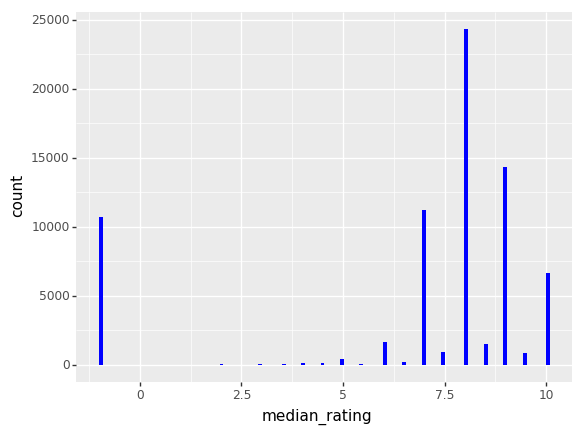

<ggplot: (150822335815)>

In [17]:
ggplot(rating_mediano)+aes("median_rating")+geom_histogram(fill="blue")

C:\Users\Alberto\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 121'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


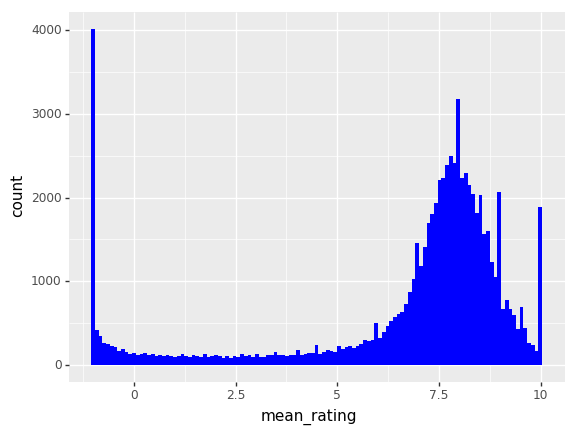

<ggplot: (150770427831)>

In [18]:
ggplot(rating_media)+aes("mean_rating")+geom_histogram(fill="blue")


C:\Users\Alberto\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 231'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


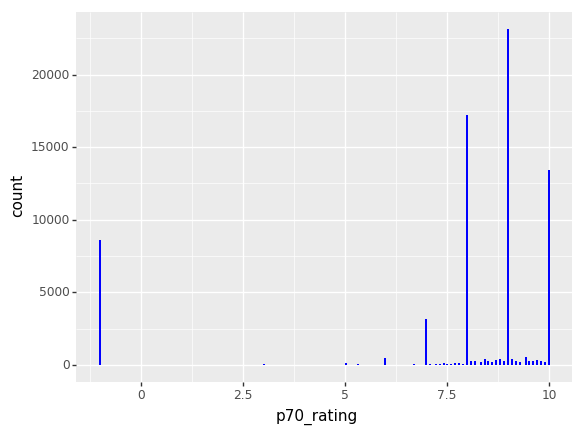

<ggplot: (150770400853)>

In [19]:
ggplot(rating_p70)+aes("p70_rating")+geom_histogram(fill="blue")

# Para clusterização só irei utilizar observações em que o rating de um certo anime seja os 30% melhores. Esse processo é realizado para selecionar os melhores animes. 

In [20]:
animes_bem_avaliados=np.where(rating_geral2["rating"]>=rating_geral2["p70_rating"])[0]

In [21]:
len(animes_bem_avaliados)

4190162

In [22]:
dados_animes_bem_avaliados=rating_geral2.iloc[animes_bem_avaliados,:]
dados_animes_bem_avaliados.head()

,user_id,median_rating,anime_id,rating,mean_rating,p70_rating
0,1,-1.0,20,-1,-0.712418,-1.0
1,1,-1.0,24,-1,-0.712418,-1.0
2,1,-1.0,79,-1,-0.712418,-1.0
3,1,-1.0,226,-1,-0.712418,-1.0
4,1,-1.0,241,-1,-0.712418,-1.0


# Para clusterização só serão selecionados uma parte dos usuários por conta do tempo de execução da clusterização.

In [23]:
pos=np.where(dados_animes_bem_avaliados["user_id"]<=10000)[0]

In [24]:
dados_animes_bem_avaliados=dados_animes_bem_avaliados.iloc[pos,:]

In [25]:
dados_animes_bem_avaliados

,user_id,median_rating,anime_id,rating,mean_rating,p70_rating
0,1,-1.0,20,-1,-0.712418,-1.0
1,1,-1.0,24,-1,-0.712418,-1.0
2,1,-1.0,79,-1,-0.712418,-1.0
3,1,-1.0,226,-1,-0.712418,-1.0
4,1,-1.0,241,-1,-0.712418,-1.0
5,1,-1.0,355,-1,-0.712418,-1.0
6,1,-1.0,356,-1,-0.712418,-1.0
7,1,-1.0,442,-1,-0.712418,-1.0
8,1,-1.0,487,-1,-0.712418,-1.0
9,1,-1.0,846,-1,-0.712418,-1.0


# Essa matriz é simplesmente uma contagem, em que seus elementos são 0 ou 1. Sendo 1 se o usuário assistiu determinado anime e 0 se não assistiu. Será utilizada posteriormente para as recomendações.

In [26]:
matriz_ocorrencias=pd.crosstab(dados_animes_bem_avaliados["user_id"]
,dados_animes_bem_avaliados["anime_id"])
matriz_ocorrencias

anime_id,1,5,6,7,8,15,16,...,34015,34085,34103,34136,34240,34283,34325
user_id,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0
5,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0


In [27]:
np.unique(matriz_ocorrencias,return_counts=True)

(array([0, 1], dtype=int64), array([72193157,   556843], dtype=int64))

# Essa é uma matriz em que seus elementos são as avaliações(rating), linhas correspondem aos usuários e as colunas os animes. Essa matriz será utilizada na clusterização dos usuários para recomendação de animes e análise.

In [28]:
m=dados_animes_bem_avaliados.pivot_table(index=['user_id'],
                            columns=['anime_id'], values='rating')
len(np.unique(dados_animes_bem_avaliados["anime_id"]))

7275

# É realizado uma substituição dos numéros inexistentes devido aos usuários que não assistiram a algum determinado anime.

In [29]:
m.replace({np.nan:0 }, regex=True, inplace = True)
m

anime_id,1,5,6,7,8,15,16,...,34015,34085,34103,34136,34240,34283,34325
user_id,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,8.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
np.unique(m,return_counts=True)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([  132592, 72193157,       51,       35,       36,      145,
             419,     2507,    26417,   122251,   147813,   124577],
       dtype=int64))

In [31]:
from sklearn.cluster import KMeans

# Aqui é realizado um processo de determinação da quantidade de clusters, conhecida como método elbow, devido a imposição do problema ter um número baixo de clusters o número escolhido foi 4. Obs: Pode demorar alguns minutos por ter várias dimensões. Não usei PCA por não atender uma suposição importante da distribuição de probabilidade multivariada dos dados.

In [33]:
lista_inertia=[]
for i in [2,3,4]:
    cluster_temporario=KMeans(max_iter=500,n_clusters=i)
    print(i)
    cluster_temporario.fit(m)
    lista_inertia.append(cluster_temporario.inertia_)

2
3
4


In [34]:
lista_inertia

[30115091.870023422, 29564200.97466224, 29130227.756256685]

In [35]:
cluster=KMeans(n_clusters=4,max_iter=500)
cluster.fit(m)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
np.unique(cluster.labels_,return_counts=True)

(array([0, 1, 2, 3]), array([ 305, 1401, 1424, 6870], dtype=int64))

In [37]:
matriz_ocorrencias["cluster"]=cluster.labels_

In [38]:
matriz_ocorrencias.head()

anime_id,1,5,6,7,8,15,16,...,34085,34103,34136,34240,34283,34325,cluster
user_id,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2
4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,3
5,0,0,1,0,0,1,0,...,0,0,0,0,0,0,2


In [39]:
id_user_cluster0=matriz_ocorrencias[matriz_ocorrencias["cluster"]==0].index
id_user_cluster1=matriz_ocorrencias[matriz_ocorrencias["cluster"]==1].index
id_user_cluster2=matriz_ocorrencias[matriz_ocorrencias["cluster"]==2].index
id_user_cluster3=matriz_ocorrencias[matriz_ocorrencias["cluster"]==3].index

# As recomendações dos animes se dará da seguinte forma: de cada cluster serão selecionados os 10 animes mais vistos e assim serão selecionados posteriormente.

In [40]:
proporcao_anime0=np.mean(matriz_ocorrencias[matriz_ocorrencias["cluster"]==0].drop("cluster",axis=1),axis=0)
proporcao_anime1=np.mean(matriz_ocorrencias[matriz_ocorrencias["cluster"]==1].drop("cluster",axis=1),axis=0)
proporcao_anime2=np.mean(matriz_ocorrencias[matriz_ocorrencias["cluster"]==2].drop("cluster",axis=1),axis=0)
proporcao_anime3=np.mean(matriz_ocorrencias[matriz_ocorrencias["cluster"]==3].drop("cluster",axis=1),axis=0)

# Matriz que será utilizada para analisar separadamente os clusters, com todos os animes.

In [41]:
a=pd.merge(rating,anime,on=["anime_id","anime_id"])

In [42]:
a=a[a["user_id"]<=10000]
a

,user_id,anime_id,rating,name,genre,type,episodes,members,rating_medio_por_anime
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,7.81
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,7.81
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,7.81
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,7.81
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,7.81
5,21,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,7.81
6,28,20,9,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,7.81
7,34,20,9,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,7.81
8,38,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,7.81
9,39,20,10,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,7.81


# Matriz de uns e zeros. Indicando 1 se o usuário assistiu certo anime e 0 caso contrário.

In [43]:
matriz_analise=pd.crosstab(a["user_id"],a["anime_id"])
matriz_analise

anime_id,1,5,6,7,8,15,16,...,34107,34136,34173,34240,34283,34324,34325
user_id,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0
5,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0


In [44]:
np.unique(matriz_analise)

array([0, 1], dtype=int64)

In [45]:
anime=anime.set_index("anime_id")

# Selecionando os animes mais vistos do cluster 0

In [46]:
p0=proporcao_anime0.iloc[np.argsort(proporcao_anime0)[-10:-1]]
p0

anime_id
4181     0.724590
5081     0.727869
16498    0.727869
5114     0.734426
2167     0.744262
6547     0.757377
4224     0.770492
2904     0.773770
1575     0.813115
dtype: float64

In [47]:
p00=p0.index
p00

Index([4181, 5081, 16498, 5114, 2167, 6547, 4224, 2904, 1575], dtype='object', name='anime_id')

# Recomendação de animes para usuários do cluster 0

In [48]:
anime.loc[p00,:]

,name,genre,type,episodes,members,rating_medio_por_anime
anime_id,,,,,,
4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,456749,9.06
5081,Bakemonogatari,"Mystery, Romance, Supernatural, Vampire",TV,15,482268,8.39
16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,896229,8.54
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,793665,9.26
2167,Clannad,"Comedy, Drama, Romance, School, Slice of Life,...",TV,23,566690,8.30
6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,717796,8.39
4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,633817,8.45
2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,572888,8.98
1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,715151,8.83


In [49]:
k=matriz_analise.loc[id_user_cluster0.values,:]
k

anime_id,1,5,6,7,8,15,16,...,34107,34136,34173,34240,34283,34324,34325
user_id,,,,,,,,,,,,,,,
17,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0
46,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0
73,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
210,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0
226,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0
233,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
271,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0
294,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0


In [50]:
b=np.mean(k,axis=0)
b

anime_id
1        0.583607
5        0.347541
6        0.442623
7        0.157377
8        0.009836
15       0.144262
16       0.337705
17       0.032787
18       0.114754
19       0.298361
20       0.645902
22       0.131148
23       0.000000
24       0.426230
25       0.131148
26       0.127869
27       0.206557
28       0.104918
29       0.016393
30       0.727869
31       0.331148
32       0.537705
33       0.337705
43       0.442623
44       0.304918
45       0.304918
46       0.114754
47       0.373770
48       0.239344
49       0.154098
           ...   
33569    0.039344
33588    0.003279
33605    0.003279
33606    0.013115
33618    0.000000
33658    0.003279
33659    0.000000
33709    0.003279
33713    0.006557
33740    0.006557
33741    0.003279
33750    0.000000
33775    0.000000
33798    0.013115
33902    0.006557
33905    0.000000
33934    0.013115
33964    0.032787
33979    0.003279
34015    0.003279
34048    0.003279
34085    0.022951
34103    0.131148
34107    0.006557
3

# anime_id que foram assistidos por pelo menos um usuário do cluster 0

In [51]:
b.iloc[np.where(b!=0)[0]].index

Int64Index([    1,     5,     6,     7,     8,    15,    16,    17,    18,
               19,
            ...
            34015, 34048, 34085, 34103, 34107, 34136, 34173, 34240, 34283,
            34324],
           dtype='int64', name='anime_id', length=6890)

# Todos os animes assistidos por usuário do cluster 0

In [52]:
animes_cluster0=anime.loc[b.iloc[np.where(b!=0)[0]].index,:]
animes_cluster0

,name,genre,type,episodes,members,rating_medio_por_anime
anime_id,,,,,,
1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,486824,8.82
5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,137636,8.40
6,Trigun,"Action, Comedy, Sci-Fi",TV,26,283069,8.32
7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,64905,7.36
8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,9848,7.06
15,Eyeshield 21,"Action, Comedy, Shounen, Sports",TV,145,83648,8.08
16,Hachimitsu to Clover,"Comedy, Drama, Josei, Romance",TV,24,130646,8.18
17,Hungry Heart: Wild Striker,"Comedy, Shounen, Slice of Life, Sports",TV,52,13469,7.74
18,Initial D Fourth Stage,"Action, Cars, Drama, Seinen, Sports",TV,24,41584,8.24


# Explorando algumas características dos animes assistidos pelo cluster 0

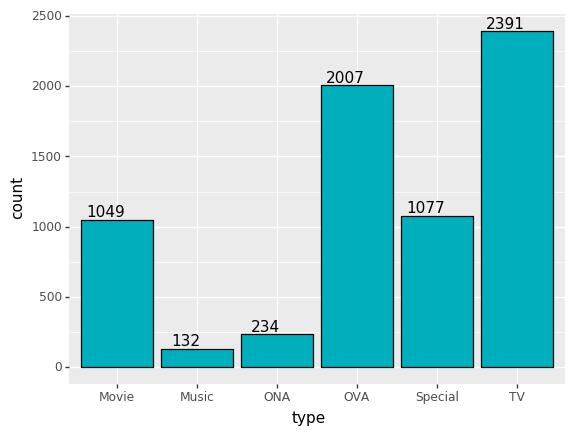

<ggplot: (-9223371886028116441)>

In [53]:
(ggplot(animes_cluster0)+aes("type")+geom_bar(fill="#00AFBB",color="black")+ geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_x=-0.14,
     nudge_y=0.125,
     va='bottom'
 ))

C:\Users\Alberto\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 397'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


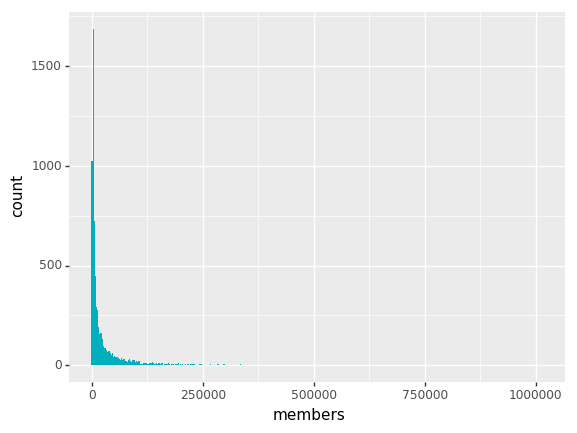

<ggplot: (150826659553)>

In [54]:
ggplot(animes_cluster0)+aes("members")+geom_histogram(fill="#00AFBB")

C:\Users\Alberto\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 67'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


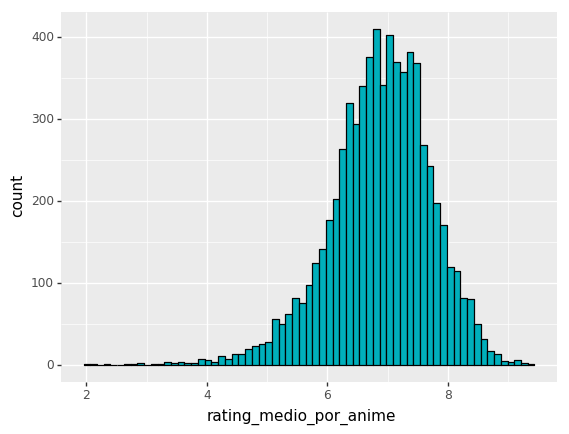

<ggplot: (150825497997)>

In [55]:
ggplot(animes_cluster0)+aes("rating_medio_por_anime")+geom_histogram(fill="#00AFBB",color="black")

In [56]:
animes_cluster0.describe()

,members,rating_medio_por_anime
count,6.890000e+03,6890.000000
mean,3.116515e+04,6.873718
std,6.974066e+04,0.842883
min,4.300000e+01,2.000000
25%,2.137500e+03,6.380000
50%,6.485000e+03,6.920000
75%,2.649275e+04,7.440000
max,1.013917e+06,9.370000


# Selecionando os anime_id mais vistos do cluster 1

In [57]:
p1=proporcao_anime1.iloc[np.argsort(proporcao_anime1)[-10:-1]]
p1

anime_id
5114    0.438972
30      0.443255
849     0.443969
2001    0.460385
1       0.465382
121     0.499643
199     0.516060
2904    0.566738
1535    0.608851
dtype: float64

In [58]:
p11=p1.index
p11

Index([5114, 30, 849, 2001, 1, 121, 199, 2904, 1535], dtype='object', name='anime_id')

# Recomendação de animes para usuários do cluster 1

In [59]:
anime.loc[p11,:]

,name,genre,type,episodes,members,rating_medio_por_anime
anime_id,,,,,,
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,793665,9.26
30,Neon Genesis Evangelion,"Action, Dementia, Drama, Mecha, Psychological,...",TV,26,461946,8.32
849,Suzumiya Haruhi no Yuuutsu,"Comedy, Mystery, Parody, School, Sci-Fi, Slice...",TV,14,428569,8.06
2001,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi",TV,27,562962,8.78
1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,486824,8.82
121,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,600384,8.33
199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,466254,8.93
2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,572888,8.98
1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,1013917,8.71


In [60]:
k=matriz_analise.loc[id_user_cluster1.values,:]


In [61]:
b=np.mean(k,axis=0)
b


anime_id
1        0.561742
5        0.334047
6        0.410421
7        0.123483
8        0.022841
15       0.072091
16       0.177016
17       0.022127
18       0.074233
19       0.161313
20       0.507495
22       0.080657
23       0.000714
24       0.274090
25       0.102784
26       0.082798
27       0.205567
28       0.059957
29       0.008565
30       0.640971
31       0.254104
32       0.417559
33       0.255532
43       0.394718
44       0.262670
45       0.266238
46       0.094218
47       0.389008
48       0.188437
49       0.089936
           ...   
33569    0.003569
33588    0.000000
33605    0.000000
33606    0.001428
33618    0.000000
33658    0.000000
33659    0.000000
33709    0.000000
33713    0.000000
33740    0.000000
33741    0.000714
33750    0.000000
33775    0.000000
33798    0.000000
33902    0.001428
33905    0.000000
33934    0.000714
33964    0.004283
33979    0.000000
34015    0.000000
34048    0.000000
34085    0.002855
34103    0.006424
34107    0.000000
3

# anime_id que foram assistidos por pelo menos um usuário do cluster 1

In [62]:
b.iloc[np.where(b!=0)[0]].index

Int64Index([    1,     5,     6,     7,     8,    15,    16,    17,    18,
               19,
            ...
            33569, 33606, 33741, 33902, 33934, 33964, 34085, 34103, 34240,
            34283],
           dtype='int64', name='anime_id', length=6794)

In [63]:
animes_cluster1=anime.loc[b.iloc[np.where(b!=0)[0]].index,:]
animes_cluster1

,name,genre,type,episodes,members,rating_medio_por_anime
anime_id,,,,,,
1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,486824,8.82
5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,137636,8.40
6,Trigun,"Action, Comedy, Sci-Fi",TV,26,283069,8.32
7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,64905,7.36
8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,9848,7.06
15,Eyeshield 21,"Action, Comedy, Shounen, Sports",TV,145,83648,8.08
16,Hachimitsu to Clover,"Comedy, Drama, Josei, Romance",TV,24,130646,8.18
17,Hungry Heart: Wild Striker,"Comedy, Shounen, Slice of Life, Sports",TV,52,13469,7.74
18,Initial D Fourth Stage,"Action, Cars, Drama, Seinen, Sports",TV,24,41584,8.24


# Explorando algumas características dos animes assistidos pelo cluster 1

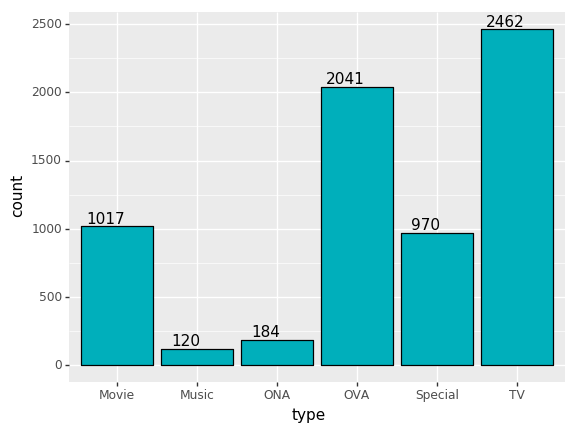

<ggplot: (-9223371886084271977)>

In [64]:
(ggplot(animes_cluster1)+aes("type")+geom_bar(fill="#00AFBB",color="black")+ geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_x=-0.14,
     nudge_y=0.125,
     va='bottom'
 ))

C:\Users\Alberto\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 384'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


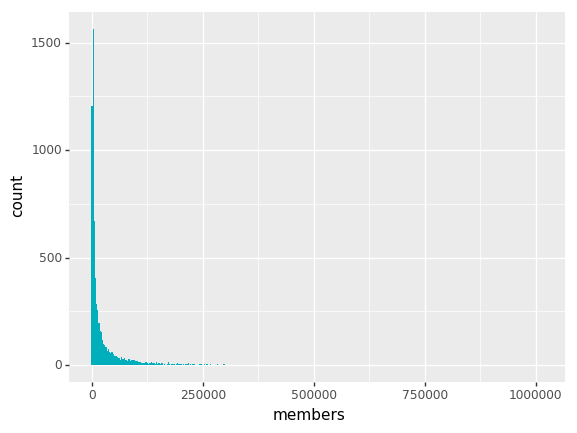

<ggplot: (-9223371886084268775)>

In [65]:
ggplot(animes_cluster1)+aes("members")+geom_histogram(fill="#00AFBB")

C:\Users\Alberto\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 67'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


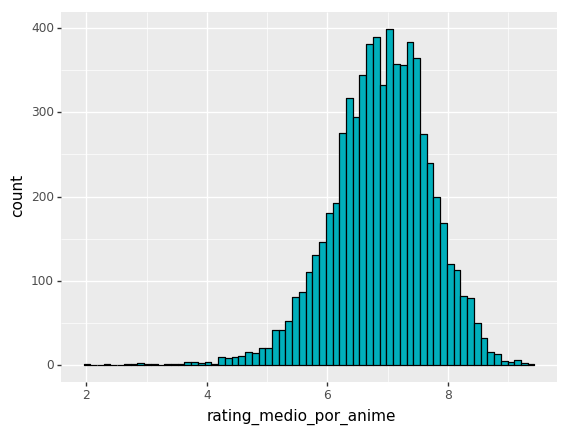

<ggplot: (150770462237)>

In [66]:
ggplot(animes_cluster1)+aes("rating_medio_por_anime")+geom_histogram(fill="#00AFBB",color="black")

In [67]:
animes_cluster1.describe()

,members,rating_medio_por_anime
count,6.794000e+03,6794.000000
mean,3.141613e+04,6.893137
std,7.019227e+04,0.813068
min,5.300000e+01,2.000000
25%,1.925500e+03,6.390000
50%,6.397000e+03,6.930000
75%,2.698275e+04,7.440000
max,1.013917e+06,9.370000


# Selecionando os anime_id mais vistos do cluster 2

In [68]:
p2=proporcao_anime2.iloc[np.argsort(proporcao_anime2)[-10:-1]]
p2

anime_id
4224     0.453652
2904     0.498596
1575     0.513343
6547     0.538624
5114     0.540028
1535     0.555478
11757    0.560393
9253     0.561798
19815    0.594101
dtype: float64

In [69]:
p22=p2.index
p22

Index([4224, 2904, 1575, 6547, 5114, 1535, 11757, 9253, 19815], dtype='object', name='anime_id')

# Recomendação de animes para usuários do cluster 2

In [70]:
anime.loc[p22,:]

,name,genre,type,episodes,members,rating_medio_por_anime
anime_id,,,,,,
4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,633817,8.45
2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,572888,8.98
1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,715151,8.83
6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,717796,8.39
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,793665,9.26
1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,1013917,8.71
11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,893100,7.83
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,673572,9.17
19815,No Game No Life,"Adventure, Comedy, Ecchi, Fantasy, Game, Super...",TV,12,602291,8.47


In [71]:
k=matriz_analise.loc[id_user_cluster2.values,:]

In [72]:
b=np.mean(k,axis=0)
b

anime_id
1        0.205758
5        0.048455
6        0.143258
7        0.011938
8        0.002809
15       0.066011
16       0.035112
17       0.011938
18       0.028090
19       0.076545
20       0.541433
22       0.044944
23       0.000702
24       0.078652
25       0.026685
26       0.014045
27       0.056882
28       0.021067
29       0.001404
30       0.239466
31       0.047753
32       0.127107
33       0.109551
43       0.081461
44       0.047051
45       0.093399
46       0.008427
47       0.100421
48       0.035112
49       0.010534
           ...   
33569    0.007725
33588    0.000000
33605    0.000000
33606    0.003511
33618    0.000702
33658    0.000000
33659    0.000702
33709    0.000000
33713    0.000000
33740    0.000702
33741    0.000000
33750    0.000702
33775    0.000000
33798    0.001404
33902    0.000702
33905    0.000000
33934    0.000702
33964    0.011236
33979    0.000000
34015    0.000000
34048    0.000000
34085    0.000000
34103    0.035815
34107    0.000702
3

# anime_id que foram assistidos por pelo menos um usuário do cluster 2

In [73]:
b.iloc[np.where(b!=0)[0]].index

Int64Index([    1,     5,     6,     7,     8,    15,    16,    17,    18,
               19,
            ...
            33750, 33798, 33902, 33934, 33964, 34103, 34107, 34240, 34283,
            34325],
           dtype='int64', name='anime_id', length=5531)

In [74]:
animes_cluster2=anime.loc[b.iloc[np.where(b!=0)[0]].index,:]
animes_cluster2

,name,genre,type,episodes,members,rating_medio_por_anime
anime_id,,,,,,
1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,486824,8.82
5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,137636,8.40
6,Trigun,"Action, Comedy, Sci-Fi",TV,26,283069,8.32
7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,64905,7.36
8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,9848,7.06
15,Eyeshield 21,"Action, Comedy, Shounen, Sports",TV,145,83648,8.08
16,Hachimitsu to Clover,"Comedy, Drama, Josei, Romance",TV,24,130646,8.18
17,Hungry Heart: Wild Striker,"Comedy, Shounen, Slice of Life, Sports",TV,52,13469,7.74
18,Initial D Fourth Stage,"Action, Cars, Drama, Seinen, Sports",TV,24,41584,8.24


# Explorando algumas características dos animes assistidos pelo cluster 2

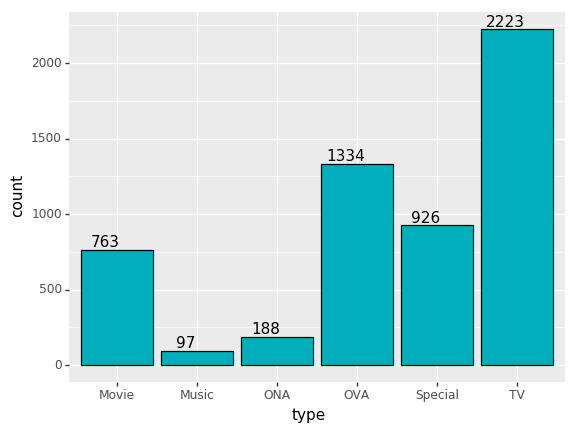

<ggplot: (150821130949)>

In [75]:
(ggplot(animes_cluster2)+aes("type")+geom_bar(fill="#00AFBB",color="black")+ geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_x=-0.14,
     nudge_y=0.125,
     va='bottom'
 ))

C:\Users\Alberto\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 264'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


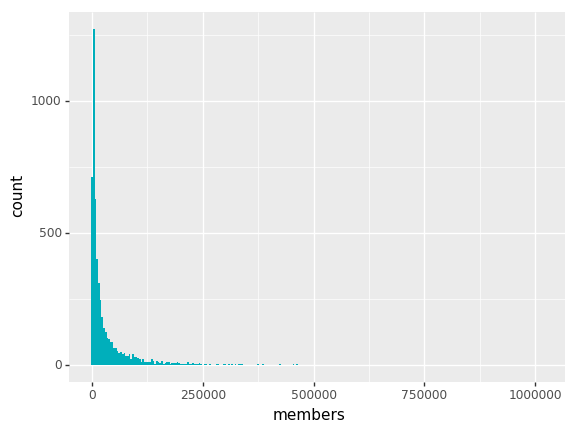

<ggplot: (-9223371886066844977)>

In [76]:
ggplot(animes_cluster2)+aes("members")+geom_histogram(fill="#00AFBB")

C:\Users\Alberto\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 71'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


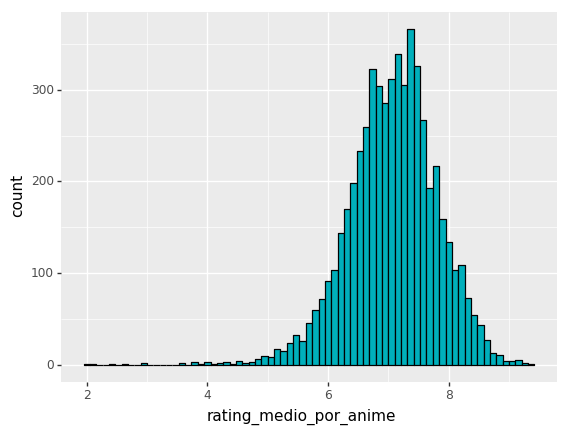

<ggplot: (150787960724)>

In [77]:
ggplot(animes_cluster2)+aes("rating_medio_por_anime")+geom_histogram(fill="#00AFBB",color="black")

In [78]:
animes_cluster2.describe()

,members,rating_medio_por_anime
count,5.531000e+03,5531.000000
mean,3.835377e+04,7.064889
std,7.613308e+04,0.743138
min,4.400000e+01,2.000000
25%,3.588000e+03,6.620000
50%,1.103100e+04,7.100000
75%,3.757650e+04,7.540000
max,1.013917e+06,9.370000


# Selecionando os anime_id mais vistos do cluster 3

In [79]:
p3=proporcao_anime3.iloc[np.argsort(proporcao_anime3)[-10:-1]]
p3

anime_id
226      0.150364
20       0.155313
2904     0.163319
121      0.170160
199      0.175109
1575     0.182242
5114     0.186608
11757    0.196507
16498    0.251965
dtype: float64

In [80]:
p33=p3.index
p33

Index([226, 20, 2904, 121, 199, 1575, 5114, 11757, 16498], dtype='object', name='anime_id')

# Recomendação de animes para usuários do cluster 3

In [81]:
anime.loc[p33,:]

,name,genre,type,episodes,members,rating_medio_por_anime
anime_id,,,,,,
226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,623511,7.85
20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297,7.81
2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,572888,8.98
121,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,600384,8.33
199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,466254,8.93
1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,715151,8.83
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,793665,9.26
11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,893100,7.83
16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,896229,8.54


In [82]:
k=matriz_analise.loc[id_user_cluster3.values,:]

In [83]:
b=np.mean(k,axis=0)
b

anime_id
1        0.139156
5        0.055022
6        0.091412
7        0.018341
8        0.003202
15       0.014410
16       0.021834
17       0.005095
18       0.010917
19       0.029549
20       0.276565
22       0.018632
23       0.000291
24       0.046870
25       0.014265
26       0.006987
27       0.033479
28       0.010771
29       0.000582
30       0.144105
31       0.042067
32       0.073799
33       0.056041
43       0.063755
44       0.038137
45       0.064920
46       0.014847
47       0.081659
48       0.033042
49       0.012227
           ...   
33569    0.000582
33588    0.000000
33605    0.000000
33606    0.000291
33618    0.000000
33658    0.000146
33659    0.000000
33709    0.000000
33713    0.000000
33740    0.000291
33741    0.000000
33750    0.000000
33775    0.000146
33798    0.000146
33902    0.000000
33905    0.000146
33934    0.000291
33964    0.000000
33979    0.000000
34015    0.000000
34048    0.000000
34085    0.000146
34103    0.003639
34107    0.000000
3

# anime_id que foram assistidos por pelo menos um usuário do cluster 3

In [84]:
b.iloc[np.where(b!=0)[0]].index

Int64Index([    1,     5,     6,     7,     8,    15,    16,    17,    18,
               19,
            ...
            33606, 33658, 33740, 33775, 33798, 33905, 33934, 34085, 34103,
            34240],
           dtype='int64', name='anime_id', length=7006)

In [85]:
animes_cluster3=anime.loc[b.iloc[np.where(b!=0)[0]].index,:]

In [86]:
animes_cluster3

,name,genre,type,episodes,members,rating_medio_por_anime
anime_id,,,,,,
1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,486824,8.82
5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,137636,8.40
6,Trigun,"Action, Comedy, Sci-Fi",TV,26,283069,8.32
7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,64905,7.36
8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,9848,7.06
15,Eyeshield 21,"Action, Comedy, Shounen, Sports",TV,145,83648,8.08
16,Hachimitsu to Clover,"Comedy, Drama, Josei, Romance",TV,24,130646,8.18
17,Hungry Heart: Wild Striker,"Comedy, Shounen, Slice of Life, Sports",TV,52,13469,7.74
18,Initial D Fourth Stage,"Action, Cars, Drama, Seinen, Sports",TV,24,41584,8.24


# Explorando algumas características dos animes assistidos pelo cluster 3

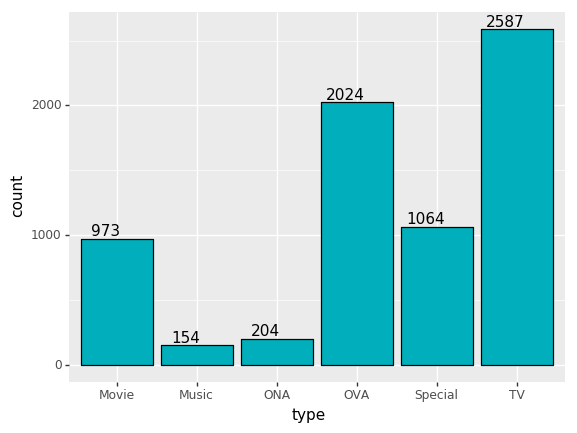

<ggplot: (150784552070)>

In [87]:
(ggplot(animes_cluster3)+aes("type")+geom_bar(fill="#00AFBB",color="black")+ geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_x=-0.14,
     nudge_y=0.125,
     va='bottom'
 ))

C:\Users\Alberto\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 411'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


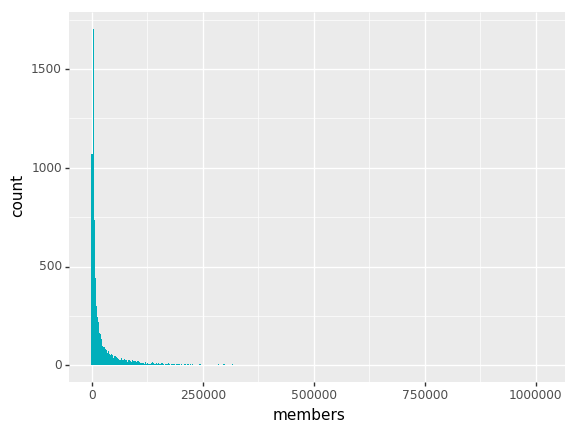

<ggplot: (150784552021)>

In [88]:
ggplot(animes_cluster3)+aes("members")+geom_histogram(fill="#00AFBB")

C:\Users\Alberto\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 71'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


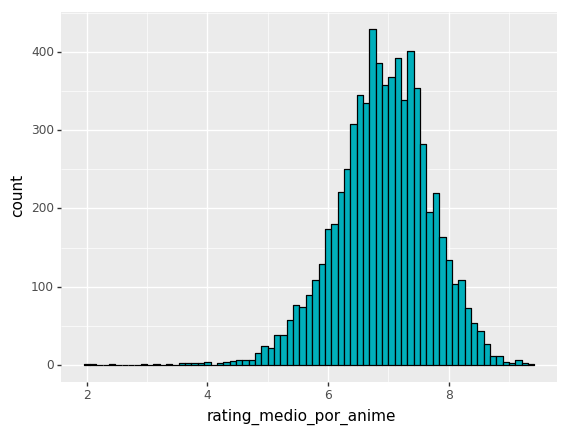

<ggplot: (150784552154)>

In [89]:
ggplot(animes_cluster3)+aes("rating_medio_por_anime")+geom_histogram(fill="#00AFBB",color="black")

In [90]:
animes_cluster3.describe()

,members,rating_medio_por_anime
count,7.006000e+03,7006.000000
mean,3.064601e+04,6.914535
std,6.926463e+04,0.779321
min,6.800000e+01,2.000000
25%,2.011750e+03,6.440000
50%,6.164000e+03,6.940000
75%,2.566625e+04,7.440000
max,1.013917e+06,9.370000
